In [1]:
# Plot H1 rejection rates

import pickle
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import os

In [2]:
#Model = "logistic"
Index = 1
n = 300
# Lapscale = 0
# Xdist = "uniform"
# sig = 0
# testtype = "Wald"
# fixedU = True
randomBeta = True
K = 5

In [3]:
nList = [300, 2000]

In [4]:
i=0
lm = 0.55

In [5]:
def PlotH1(Model, testtype, sig, fixedU, Xdist, LapscaleList):

    colorList = ['tab:orange', 'tab:blue', 'tab:purple']
    markerList = ["X", "D", "o", "^",  "P", "*"]    

    # number of vectors send
    K = 5

    if sig == 0:
        sigtype = 'Independent'
    else:
        sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

    # number of data vectors sent
    VecInd = np.array(range(1, (K+1)), int)
    fig = plt.figure()
    fig.set_size_inches(14, 4)   
    fig.suptitle(sigtype, fontsize=20) 
    for i in range(3):
        # setting index
        setInd = i + 1
        # plot the plots in each setting    
        ax = fig.add_subplot(int('13' + str(setInd)))

        
        for LapscaleInd in range(len(LapscaleList)):
            Lapscale = LapscaleList[LapscaleInd]
            rej_arrayList = []
            for nInd in range(len(nList)):
                n = nList[nInd]
                fname = Model + "_Setting_" + str(setInd ) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
                infile = open( Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
                new_dict = pickle.load(infile)
                infile.close()
                rej_array = new_dict["rej"]
                # rejection rates for n=300 or 2000
                rej_arrayList.append(np.mean(rej_array, axis = 0))
            ax.plot(VecInd, rej_arrayList[0], label = 'Lap(' + str(Lapscale)+ '), n=' + str(nList[0]), color = colorList[LapscaleInd], marker = markerList[(nInd * LapscaleInd)], markersize=12)
            ax.plot(VecInd, rej_arrayList[1], label = 'Lap(' + str(Lapscale)+ '), n=' + str(nList[1]), color = colorList[LapscaleInd], marker = markerList[(nInd * LapscaleInd)], linestyle = '--', markersize=12)

        if i==2:
            plt.legend(prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))
        elif i<2:
            plt.legend('',frameon=False)
        plt.ticklabel_format(style='plain', axis='x', useOffset=False)
        plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
        plt.ylim([0,1.1])
        plt.yticks(np.arange(0,1.04,0.1))
        ax.set_xlabel("Number of data vectors", fontsize=17)
        ax.set_ylabel("Rejection rates", fontsize=20)
        ax.set_title("Setting "+str(setInd), fontsize=20)
        plt.tight_layout()
    #===========================create folder to store output results=====================
    results_path_data = "./Result_Figure/ResultsH1"
    # Check whether the specified path exists or not
    isExist = os.path.exists(results_path_data)

    if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(results_path_data)
    fname = Model + "testSetting_H1"+ "_Xdist_" + Xdist + "_sig_"  + str(sig) +  "_fixedU_" + str(fixedU)  
    plt.savefig(Model + "_results/Result_Figure/ResultsH1" + fname +'.pdf')

In [6]:
# Model = "logistic"
# Index = 1
# n = 300
# Lapscale = 0
Xdist = "uniform"
# sig = 0
testtype = "Wald"
fixedU = False
randomBeta = True

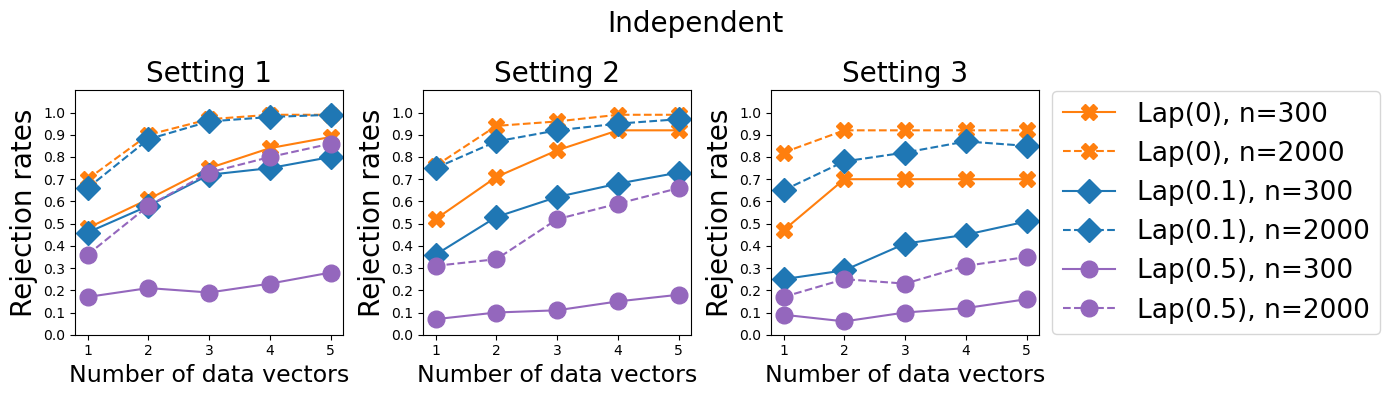

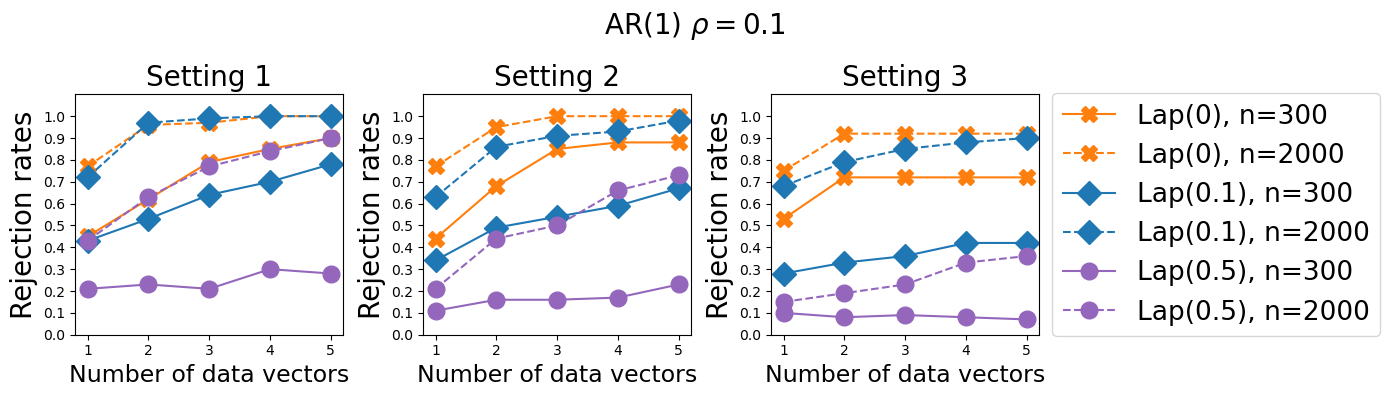

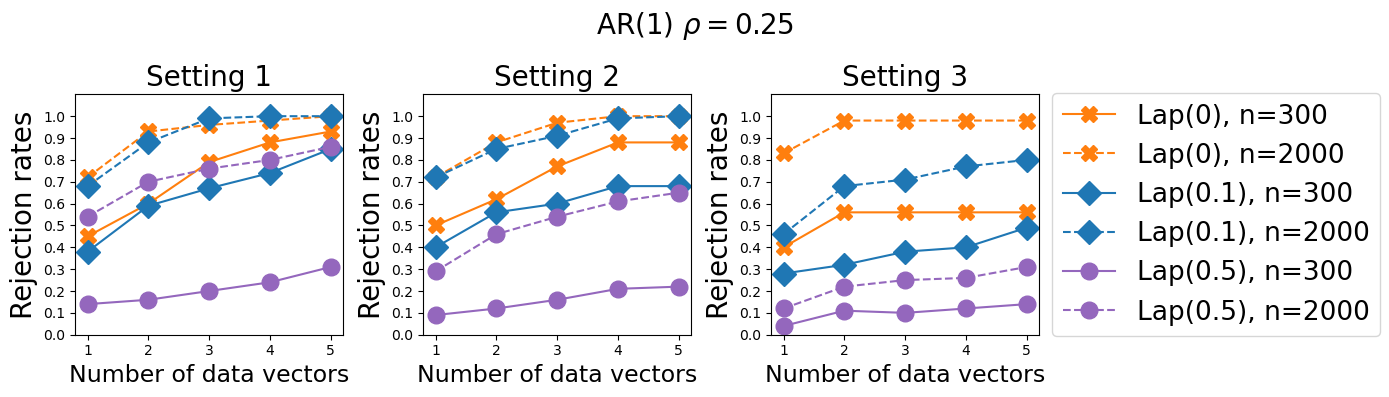

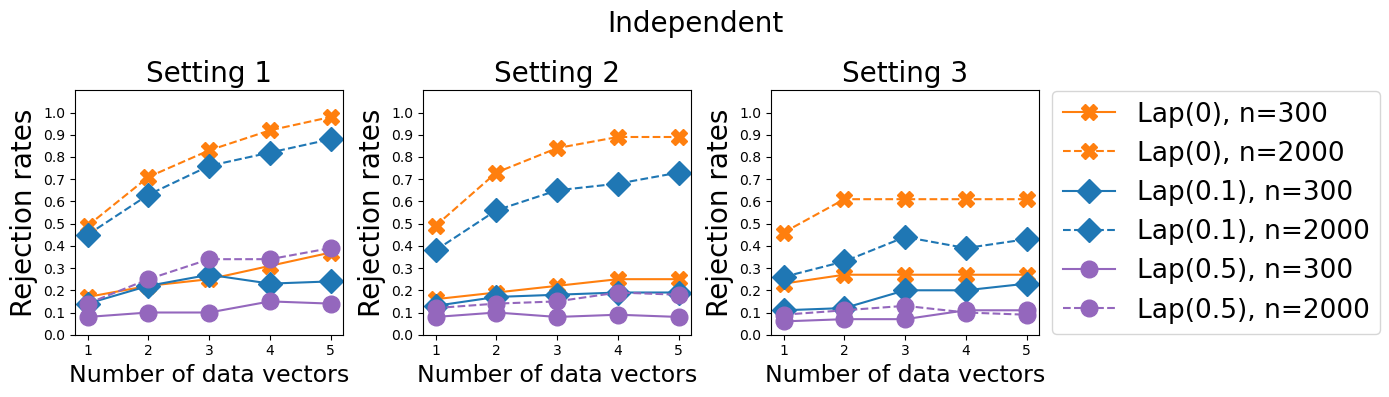

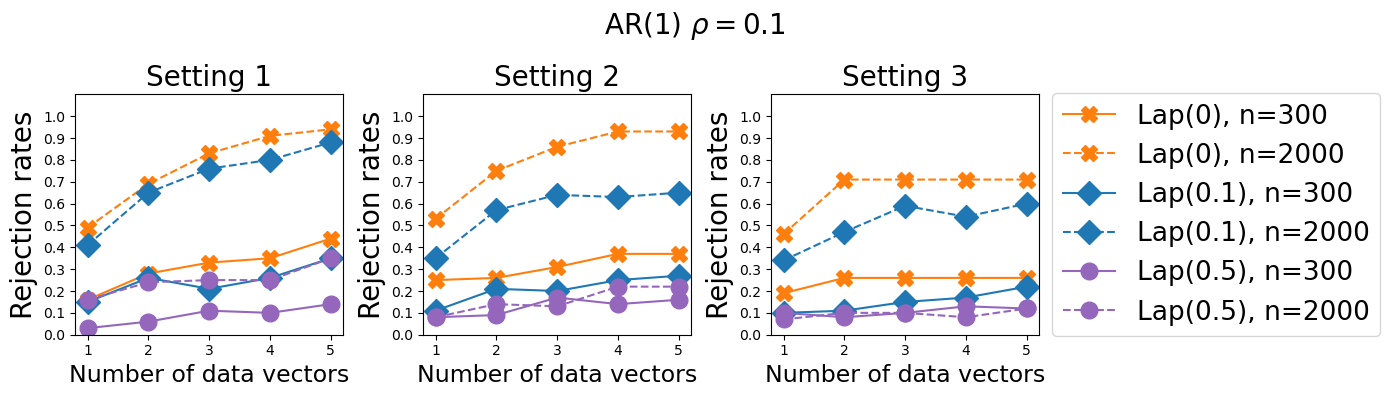

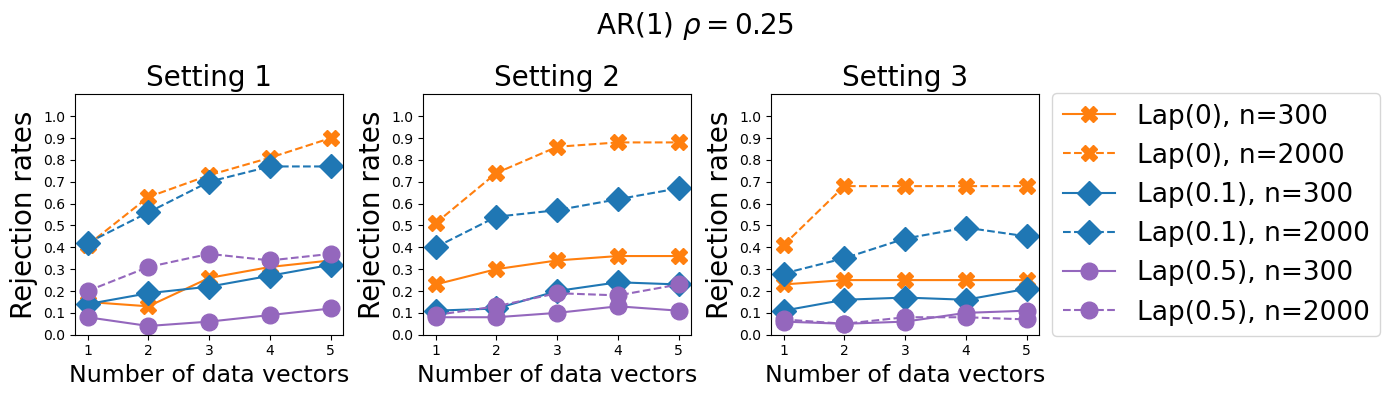

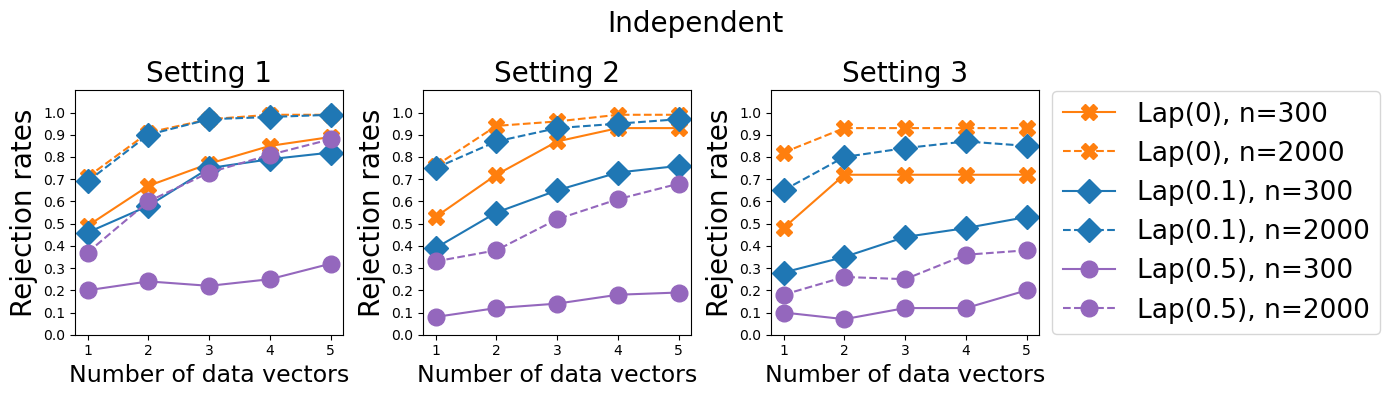

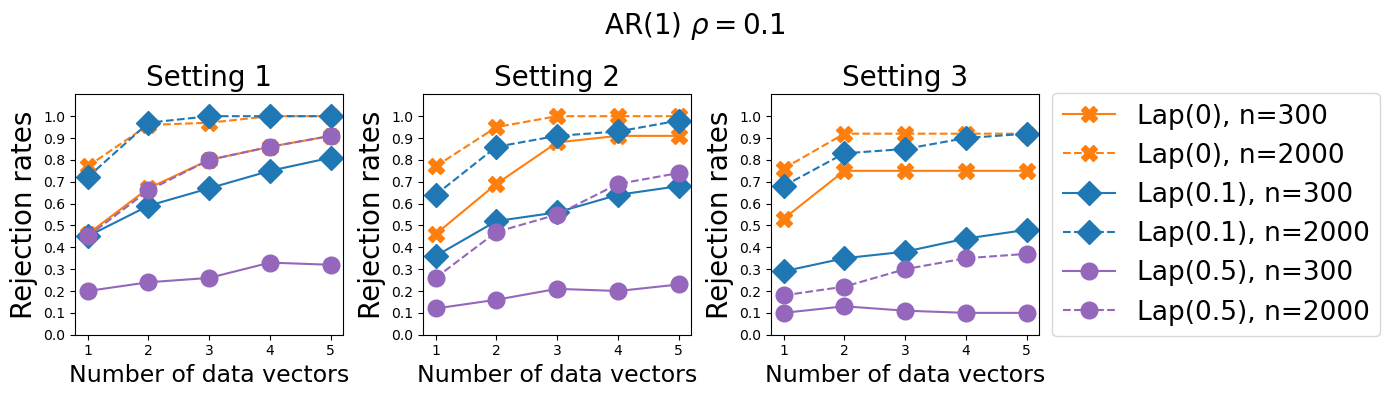

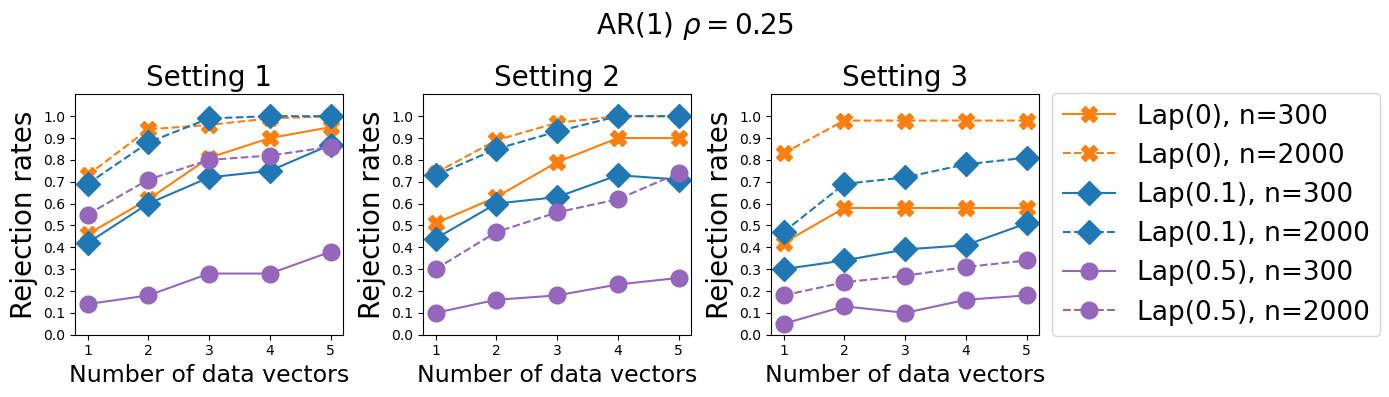

In [7]:
#ModelList = ["logistic", "normal", "logcosh"]
ModelList = ["normal", "poisson", "logcosh"]
sigList = [0, 0.1, 0.25]
LapscaleList = [0, 0.1, 0.5]

for Model in ModelList:
    for sig in sigList:
        PlotH1(Model, testtype, sig, fixedU, Xdist, LapscaleList)